<a href="https://colab.research.google.com/github/Elangoraj/Social-network-analysis/blob/main/Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analyze a Network

**1.a) Load network**

In [ ]:
# Import all libraries
import networkx as nx
import matplotlib.pyplot as plt
import collections
import random
import numpy as np
from pylab import rcParams
import matplotlib.colors as mcolors#
import operator
import random as rd
!pip install powerlaw
import powerlaw
import community
from operator import itemgetter
import scipy.stats
import scipy.sparse
import scipy.sparse.csgraph
import warnings
warnings.filterwarnings("ignore")
from collections import Counter, defaultdict
import seaborn as sns
from matplotlib import pyplot, patches 
from scipy.stats import lognorm, kstest

In [ ]:
# Load Network fropm drive
pwd = '/content/drive/MyDrive/Networks/ia-enron.csv'
fh = open(pwd, "rb")
Gx = nx.read_edgelist(fh, nodetype = int)
fh.close()

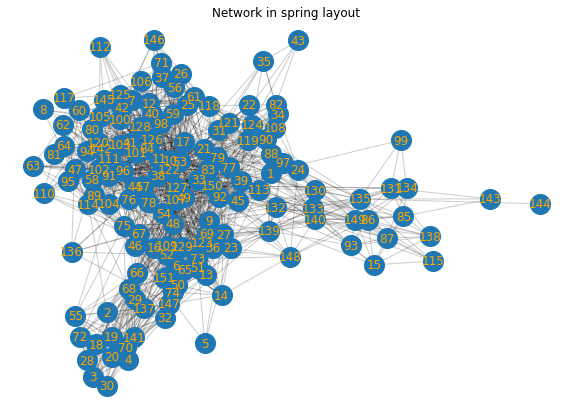

In [ ]:
# Ia eron Network visualized in spring layout
plt.figure(figsize=(10,7))
pos = nx.spring_layout(Gx)
nx.draw_networkx_nodes(Gx, pos, node_size=400)
nx.draw_networkx_edges(Gx, pos = pos, alpha=0.2)
nx.draw_networkx_labels(Gx, pos, font_color='orange', font_family='sans-serif')
plt.axis('off')
plt.title('Network in spring layout')
plt.show()

**1.b) Adjacency Matrix**

Text(0, 0.5, 'nodes')

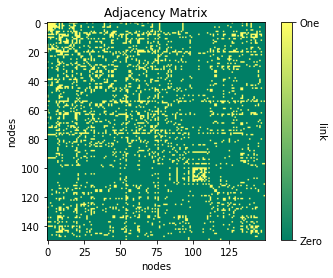

In [ ]:
# Plot for the adjacency matrix
plt.imshow(nx.to_numpy_matrix(Gx), cmap='summer')
cbar = plt.colorbar()
cbar.set_ticks([0,1])
cbar.ax.set_yticklabels(['Zero','One'],)

plt.title('Adjacency Matrix')
cbar.set_label('link', rotation=270)
plt.xlabel('nodes')
plt.ylabel('nodes')

**1.c) Degree distribution**

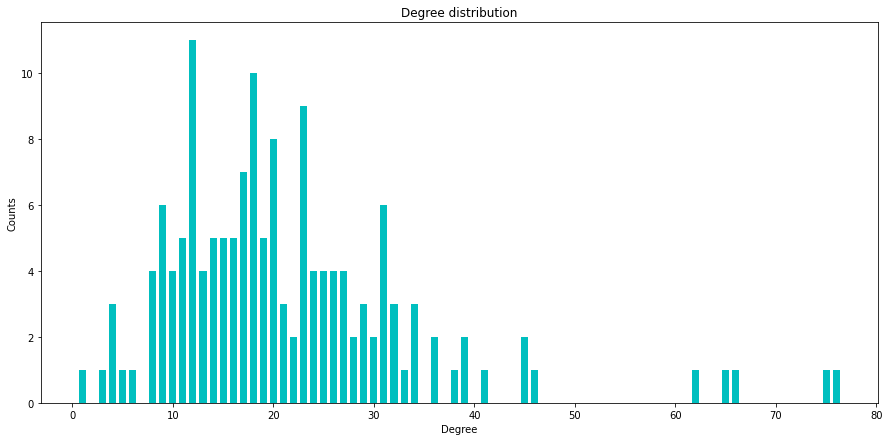

In [ ]:
# Find the degree and its respective counts of nodes
degree_sequence = sorted([d for n, d in Gx.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())                                       
 
# Bar plot 
plt.figure(figsize=(15,7))
plt.bar(deg, cnt, width=0.70, color='c') 
plt.title("Degree distribution")
plt.ylabel("Counts")
plt.xlabel("Degree")
plt.show()

**1.d) Kolomoropv-Smirnov test**

In [ ]:
# Find the lognorm for the degree distribution 
dc = list(degreeCount.values())
sigma, loc, scale = lognorm.fit(dc, floc=0)
mu = np.log(scale)

print("mu    = %9.5f" % mu)
print("sigma = %9.5f" % sigma)

# Using kstest for stats library find the p value 
stat, p = kstest(dc, 'lognorm', args=(sigma, 0, scale))
print("KS Test:")
print("stat    = %9.5f" % stat)
print("p-value = %9.5f" % p)

mu    =   0.97465
sigma =   0.76074
KS Test:
stat    =   0.20226
p-value =   0.05103


In [ ]:
# Hypothesis testing function definition 
def hypothesis_testing(p,confidence_level):
    if p<=1-(confidence_level/100):
        print('Reject the null hypothesis')
    else: print('Accept the null hypothesis')

In [ ]:
# Hypothesis testing based on confidence level

confidence_level = 95 #In percent

hypothesis_testing(p,confidence_level)

Accept the null hypothesis


H0 : Degree distribution is not lognormal shape
HA : Degree distribution is lognormal shape

Based on the confidence level the hypothesis is tested.

In the above example for confidence of 95% it is observed that we reject the alternate hypothesis and accept the null hypothesis. Hence degeree distribution is not lognormal shape at 95%.
Further confidence level can be changed and validated.

**1.e) Assortative or Disassortative**

**Assortativity** (positive assortativity) The tendency for nodes to connect to other nodes with similar properties within a network.

**Disassortativity** (negative assortativity) The tendency for nodes to connect to other nodes with dissimilar properties within a network.

Text(0.5, 1.0, 'Degree-Degree scatter plot')

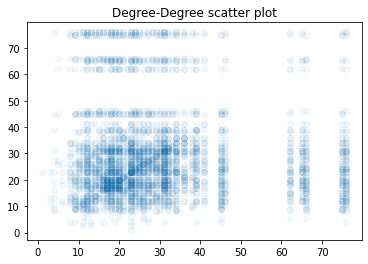

In [ ]:
x = []
y = []

# We find the degree and append in x and y list
for i,j in Gx.edges():
    x.append(Gx.degree(i))
    y.append(Gx.degree(j))
    x.append(Gx.degree(j))
    y.append(Gx.degree(i))

plt.plot(x,y,'o',alpha=0.05)
plt.title('Degree-Degree scatter plot')

From the graph it is observed that most edges connect low-degree nodes to each other, with some edges connecting low-degree and high-degree nodes, but it is quite rare that high-degree nodes are connected to each other. Therefore the network is said to be **Disassortative**.

The network degree_assortativity_coefficient function returns negative value representing Disassortative network.

In [ ]:
assortativity = nx.degree_assortativity_coefficient(Gx)
print('Assortativity of the network =', assortativity)

Assortativity of the network = -0.04538787508087504


**1.f) Fitting**

alpha=  4.21041781199002   sigma=  0.7365203583688135


Calculating best minimal value for power law fit


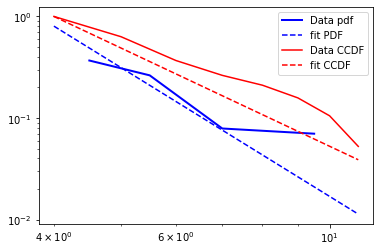

In [ ]:
# Find the fit for the degree count in the data
dcf = list(degreeCount.values())
plf = powerlaw.Fit(dcf)

# Create PDF plot
pt=plf.plot_pdf(color='b', linewidth=2)
plf.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf',ax = pt)

# Create CCDF plot
plf.plot_ccdf(color= 'r',ax = pt)
plf.power_law.plot_ccdf( color= 'r',linestyle='--',label='fit ccdf',ax = pt)

print('alpha= ',plf.power_law.alpha,'  sigma= ',plf.power_law.sigma)

plt.legend(['Data pdf', 'fit PDF', 'Data CCDF', 'fit CCDF'])
plt.show()

# **2. Centrality and Community Detection**

**2.a) Centralities**

**Degree centralities:** Degree centrality is defined as a measurement of the number of connections owned by a node. The higher the degree, the more central the node is. Depends on the direction of the network two separate measures of degree centrality are defined, indegree and outdegree. The count of incoming ties is the in-degree and the count of outgoing ties is the outdegree.

Example: Finding a popular person within the class on Twitter, in medical science to find a degree of protein, etc.

**Eigenvector centrality:** It measures a node’s importance while considering the importance of its neighbors. Here a node with few connections could have high eigenvector centrality if those few connections were to very well-connected nodes.

Example: Finding an Influential person in the country, key author in research, impactful people on social media, etc.

**Difference between Degree and Eigenvector centrality:** Degree centrality awards one centrality point for every link to the node. But in eigenvector centrality, a node is important if it is linked to another important node. Degree centrality gives the number of relationship degrees connected to the node whereas the eigenvector gives the influential node in the network. In Eigenvector centrality, a node receiving many links does not necessarily have a high eigenvector centrality and a node with high eigenvector centrality is not necessarily highly linked which is the opposite way of degree centrality. 

**When to apply:** Usually degree centrality is used when finding highly connected, popular individual, the node which can quickly connect to a wider network and one which holds most information in the network. The eigenvector is used to understand human social networks and understanding networks like malware propagation.  



**2.b.i) Closeness centrality**

In [ ]:
# Closeness centrality of the graph (total_nodes-1)/total_shortest_length_of_node
cl_ce = {}
for i in (Gx.nodes()):
    tol = sum(list(dict(nx.all_pairs_shortest_path_length(Gx))[i].values()))
    cl_ce[i] = (len(Gx.nodes())-1)/tol

In [ ]:
print('Closeness centrality of the nodes', cl_ce)

Closeness centrality of the nodes {48: 0.5418181818181819, 13: 0.4806451612903226, 67: 0.49174917491749176, 75: 0.5283687943262412, 147: 0.4501510574018127, 50: 0.44610778443113774, 38: 0.5601503759398496, 49: 0.5498154981549815, 107: 0.6208333333333333, 54: 0.5457875457875457, 27: 0.5302491103202847, 96: 0.5498154981549815, 151: 0.5016835016835017, 66: 0.5265017667844523, 129: 0.5379061371841155, 136: 0.3983957219251337, 142: 0.43440233236151604, 137: 0.4837662337662338, 76: 0.48220064724919093, 44: 0.5437956204379562, 122: 0.645021645021645, 139: 0.49174917491749176, 69: 0.5340501792114696, 114: 0.4983277591973244, 81: 0.4584615384615385, 125: 0.5033783783783784, 61: 0.5173611111111112, 39: 0.5137931034482759, 58: 0.49174917491749176, 32: 0.48220064724919093, 128: 0.5379061371841155, 91: 0.4983277591973244, 59: 0.5246478873239436, 19: 0.4318840579710145, 20: 0.40821917808219177, 63: 0.44744744744744747, 2: 0.476038338658147, 141: 0.436950146627566, 89: 0.4837662337662338, 57: 0.51557

**2.b.ii) Comparison Centralities**

In [ ]:
# Find the eigenvector centrality for the graph
eg_ce = nx.eigenvector_centrality(Gx)

Correlation value between closness and eigen vector centrality = 0.9250810688678448


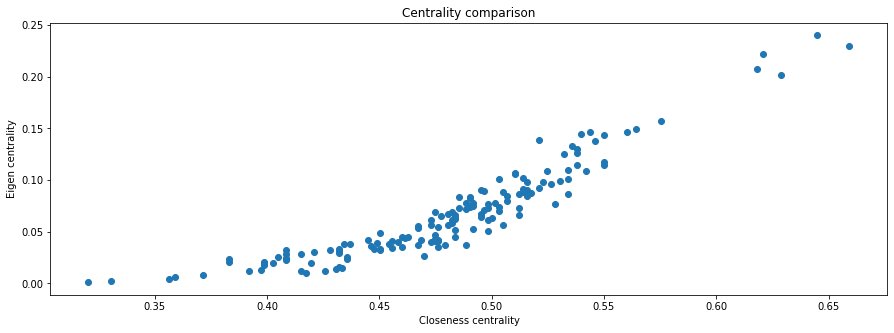

In [ ]:
# Plot the graph to compare centrality
print('Correlation value between closness and eigen vector centrality =',scipy.stats.pearsonr(list(cl_ce.values()),list(eg_ce.values()))[0])

plt.figure(figsize=(15,5))
plt.title('Centrality comparison')
plt.scatter(cl_ce.values(),eg_ce.values())
plt.xlabel('Closeness centrality')
plt.ylabel('Eigen centrality')
plt.show()

The correlation is found to be 0.925 which is really high. As closeness centrality increases eigenvector centrality also increases. 
Closeness centrality measures the closeness or the shortest path whereas the eigenvector centrality gives the influence of the node in the network. Now high correlation in both represents the nodes with high influence are connected to a high degree or shortest paths. This can be inferred from question 2.f that the maximum shortest path is itself being 4 out of the total 150 nodes.  

**2.c) Centrality measure**

The most influential node is the one having the best eigen vector centrality. It only explain the node importance based on its connections.

In [ ]:
# Find the node with with highest eigenvector centrality 
eg_ce = nx.eigenvector_centrality(Gx)
max_eg_ce = max(eg_ce.items(), key=operator.itemgetter(1))
print('Node which is more influential =', max_eg_ce[0])
print('Eigenvector value for the node =', max_eg_ce[1])

Node which is more influential = 122
Eigenvector value for the node = 0.23999231568820278


In [ ]:
def plot_influential_node(G,plot_graph):

    # Find the eigenvector centrality
    eg_ce = nx.eigenvector_centrality(G)

    print('Node which is more influential =',max(eg_ce.items(), key=operator.itemgetter(1))[0])
    print('Eigenvector value for the node =',max(eg_ce.items(), key=operator.itemgetter(1))[1])

  # Plot the graph with node color representing the eigen values
    if plot_graph==True:
        plt.figure(figsize=(15,10))
        pos = nx.spring_layout(G)

        # Define the nodes
        nodes = nx.draw_networkx_nodes(G, pos, node_size=200, cmap='Greys', node_color=list(eg_ce.values()), nodelist=list(eg_ce.keys())) 

        max_node  = list(eg_ce.keys())[max(enumerate(eg_ce.values()), key=operator.itemgetter(1))[0]]

        # Define the graph for the max eigenvector node 
        nx.draw_networkx_nodes(Gx, pos, node_size=700, node_color ='black', nodelist=nx.shortest_path(G,source=max_node,target=max_node)) 

        labels = nx.draw_networkx_labels(G, pos, font_color='white')
        edges = nx.draw_networkx_edges(G, pos, alpha = 0.2)

        cbar = plt.colorbar(nodes) 

        cbar.set_label('Eigenvector centrality     ', rotation=270) 
        plt.axis('off')
        plt.show()

    return max(eg_ce.items(), key=operator.itemgetter(1))[0]

Node which is more influential = 122
Eigenvector value for the node = 0.23999231568820278


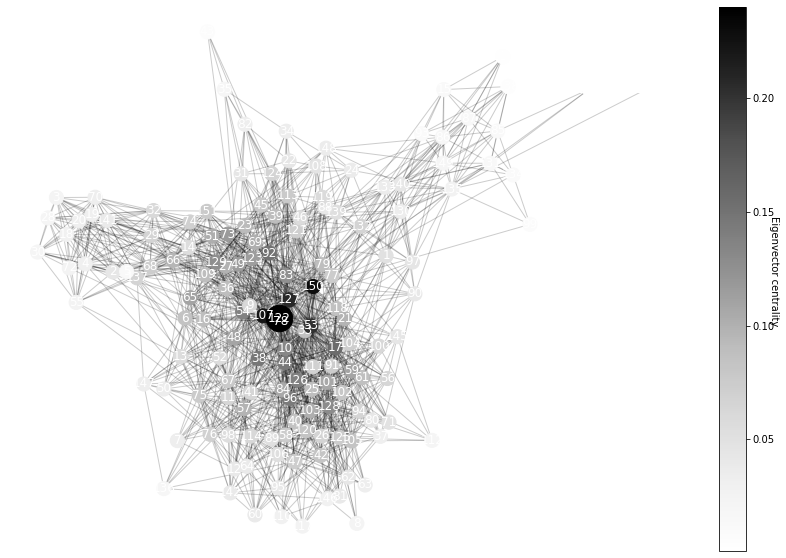

In [ ]:
# Function to plot eigenvector centrality
influential_node = plot_influential_node(Gx,True)

Based on this network we can conclude that Node **122** is the most influential node based on highest eigenvector centrality. Hence to advertise the product we can hire him/her.

**2.d) Influencer**

In [ ]:
def Draw_ego_network(G, node_id, max_distance):
  
    # Find the ego network for the node id given
    n_id = node_id
    hub_ego = nx.ego_graph(G, n_id, distance= 'weight')
    clusters=np.array(list(set(dict(hub_ego.degree).values())))

    # Find the sets out of the clusters 
    length=dict(nx.all_pairs_shortest_path_length(G,cutoff=max_distance))
    measures= length[n_id]
    clusters = np.array(list(set(measures.values())))

    # Set the size for each node based on the group it belongs to
    mv = list(measures.values())
    size = []
    for i in range(0,len(mv)):
        if mv[i] == 0: size.append(400) 
        elif mv[i] == 1: size.append(100)
        elif mv[i] == 2: size.append(50)
        else: size.append(20)

    # Set the graph from the ego network values
    plt.figure(figsize=(15,10))
    plt.title('Ego Network')
    pos = nx.spring_layout(G)
    edges = nx.draw_networkx_edges(G, pos, edge_cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), alpha=0.1)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=size, cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), node_color=list(measures.values()), nodelist=list(measures.keys()))

    # Color bar plot
    cb = plt.colorbar(nodes,ticks=range(0,len(clusters)), label='Degree')
    cb.ax.tick_params(length=0)
    cb.set_ticklabels(list(set(measures.values())))
    nodes.set_clim(-0.5, len(clusters)-0.5)
    plt.axis('off')
    plt.show()


Node which is more influential = 122
Eigenvector value for the node = 0.23999231568820278


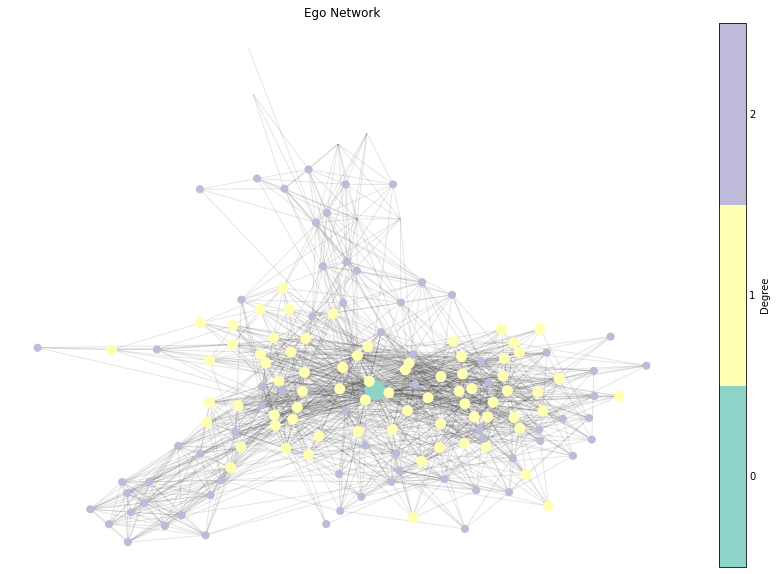

In [ ]:
# Parameters to pass the function
max_distance = 2
node_id = plot_influential_node(Gx,False) # Influencer from the question 2.c

# Function call to plot the ego network
Draw_ego_network(Gx, node_id, max_distance)

**(2.e) Community Detection and Centrality**

In [ ]:
def community_detection(G):

    # Find the best partition
    bp = community.best_partition(G)
    ov = []
    for k, v in (Counter(bp.values())).items():
        ov.append([k,v])

    # sort the values from the list
    ov = sorted(ov, key=operator.itemgetter(1), reverse=True)
    nov = [k[0] for k in ov]

    tx = {}
    for i, j in bp.items():
        tx[i] = nov.index(j)

    lo = defaultdict(list)
    for i, j in tx.items():
        lo[j].append(i)

    lo = lo.values()

    # Plot the adjacency matrix  
    loc = [n for c in lo for n in c]
    adj = nx.to_numpy_matrix(G, nodelist=loc)
    plt.figure(figsize=(10,7))
    plt.matshow(adj,interpolation=None, cmap = plt.cm.Blues)
    plt.colorbar(label='Link')
    # plt.title('Adjacency Matrix')
    plt.xlabel('Node ID')
    plt.ylabel('Node ID')

    split = [lo]
    colours = ['r']

    ax = plt.gca()

  # Plot the red boxes based on partitions
    for split, color in zip(split, colours):
        idx = 0 
        for m in split:
            ax.add_patch(patches.Rectangle((idx,idx),len(m),len(m),facecolor="none", edgecolor = color,linewidth="2"))
            idx += len(m)
    plt.show()

<Figure size 720x504 with 0 Axes>

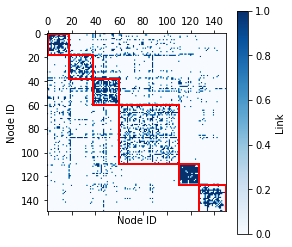

In [ ]:
# Community detection function call  
community_detection(Gx)

In [ ]:
def draw_clu(G, pos, measures, measure_name):

    # Set figure size
    plt.figure(figsize=(10,7))

    # Best partition set of groups
    clusters=np.array(list(set(measures.values())))

    # Plot the nodes based on the graph and groups
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), node_color=list(measures.values()), nodelist=list(measures.keys()))

    # Use label from networkx for identifying nodes
    labels = nx.draw_networkx_labels(G, pos)

    # Control the edges connecting the nodes
    edges = nx.draw_networkx_edges(G, pos, alpha=0.3)

    # Plot parameters 
    plt.title(measure_name)
    cb = plt.colorbar(nodes,ticks=range(0,len(clusters)), label='Communities')
    cb.ax.tick_params(length=0)
    cb.set_ticklabels(list(set(measures.values())))
    nodes.set_clim(-0.5, len(clusters)-0.5)
    plt.axis('off')
    plt.show()

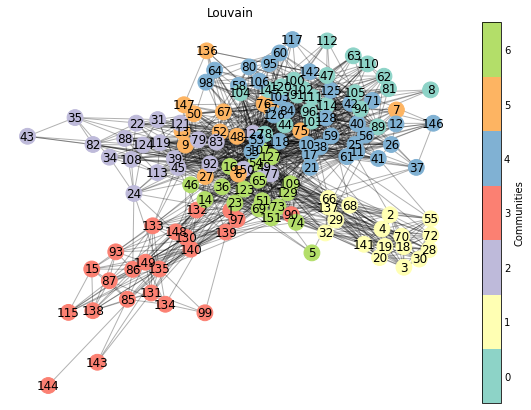

In [ ]:
# Define the parameters 
pos = nx.spring_layout(Gx)
measure = community.best_partition(Gx)
measure_name = 'Louvain'

# Call the function
draw_clu(Gx, pos, measure, measure_name)

**2.f) Longest Shortest Path**

In [ ]:
def plot_long_shortest(G):

    # Find all the shortest path of all nodes
    path = dict(nx.all_pairs_shortest_path_length(G))

    # Find the max path among the all possible shortest path for each node
    max_path = []
    for i in (list(path.keys())):
        max_path.append((i,max(path[i].items(), key=operator.itemgetter(1))[0],max(path[i].items(), key=operator.itemgetter(1))[1]))

    # Pick one of the longest shortest path within the above list max_path
    source=max(max_path,key=itemgetter(2))[0] 
    target=max(max_path,key=itemgetter(2))[1]

    # Define the network layout 
    pos = nx.spring_layout(G)

    # Define the nodes and edges for the complete graph
    nx.draw_networkx_nodes(G,pos,node_color='k',node_size=30, label=True)
    nx.draw_networkx_edges(G, pos, alpha=0.1)

    # Find shortest path between our source and target nodes
    path = nx.shortest_path(G,source=source,target=target)
    print('One of the longest shortest path in the Network:',path)

    # Plot this path over the overall graph 
    path_edges = list(zip(path,path[1:]))
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='g', label=True, node_size=200)
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='g',width=7)
    nx.draw_networkx_labels(G,pos,labels=dict(zip(path,path)), font_color='w', font_size = 8)
    plt.axis('off')
    plt.show()

One of the longest shortest path in the Network: [151, 66, 53, 135, 144]


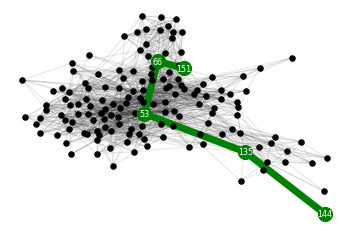

In [ ]:
# Function call
plot_long_shortest(Gx)

# 3) SI Model

**3.a) SI Model**

In [ ]:
def SI_model(G, initial_infecteds , beta, t_simulation):

    # Initialize parameters 
    initialNodesInfected = initial_infecteds
    population = len(Gx.nodes()) 
    recoveryTime = 15 

    # Declare the empty lists
    sData = []  # susceptible data
    infectedData = []  # infected data
    timeList = []  # time data (0 to time)

    # Function for finding neighbours and infected nodes
    def getInfected(graph):
        return [x for x,y in graph.nodes(data=True) if y['infected'] == 1 and y['recovered'] == False]

    def getNeighbors(graph, givenNode):
        return [x for x in graph.neighbors(givenNode)]

    # accessing nodes
    nodes = G.nodes()

    # setting initial conditions
    for node in nodes:
        if int(node) in initialNodesInfected:
            G.nodes[node]['infected'] = True
        else:
            G.nodes[node]['infected'] = False
        G.nodes[node]['recovered'] = False
        G.nodes[node]['recoveryTime'] = 0

    # Iterate for t_simulation
    for t in range(t_simulation):
        # adding the time t
        timeList.append(t)

        # infecting nodes based on beta value
        infected = getInfected(G)
        for j in infected:
            neighbors = getNeighbors(G, j)
            for n in neighbors:
                rand = rd.random()
                if rand <= beta:
                    G.nodes[n]['infected'] = True

        # Append all infected results
        infected = getInfected(G)
        infectedData.append(len(infected))
        sData.append(population - len(infected))

        pos = nx.spring_layout(G)

        # Plot the infected simulation at multiple checkpoints in the graph 
        if t in (2,30,50):
            color_map = []
            for iteration in (list(G.nodes())):
                color_map.append('green')
            print('Day number =',t)
            print('Infected =',len(infected))
            for i in (infected):
                if int(i)<116:  color_map[int(i)-1] = 'red'
                else: color_map[int(i)-2] = 'red'

            nx.draw(G, pos, node_color=color_map, with_labels=True)
            plt.show()

    # Plot the line graph comparing S and I 
    plt.title('SI Model')
    plt.plot(timeList, sData, label="Susceptible", color = 'g')
    plt.plot(timeList, infectedData, label="Infected", color='r')
    plt.legend()
    plt.show()

    return sData, infectedData


Day number = 2
Infected = 10


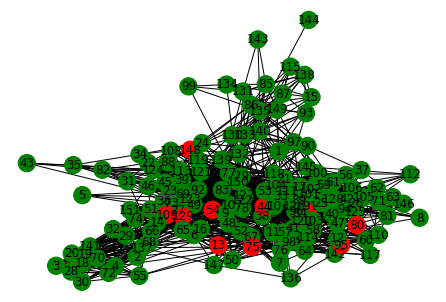

Day number = 30
Infected = 130


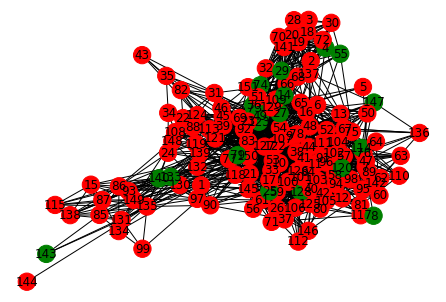

Day number = 50
Infected = 144


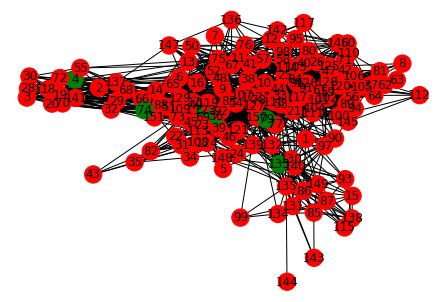

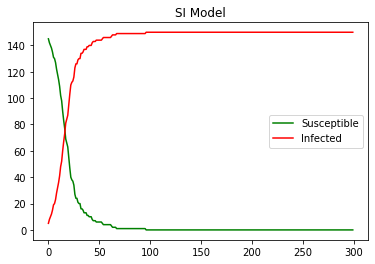

In [ ]:
# Define parameters
initial_infecteds = [10,15,20]
beta = 0.01
t_simulation = 300

# SI model function call
SI_Suscetible, SI_Infected = SI_model(Gx, initial_infecteds , beta, t_simulation)

**3.b) SIR Model**

In [ ]:
def SIR_model(G, initial_infecteds , beta, t_simulation, recoveryTime):
  
    # Initialize parameters 
    population = len(Gx.nodes())  # how many nodes
    initialNodesInfected = initial_infecteds  

    # Declare the empty lists
    sData = []  # susceptible data
    sData_SIR = []
    infectedData = []  # infected data
    recoveredData = [] 
    timeList = []  # time data (0 to time)

    # Function for finding neighbours, recovered and infected nodes
    def getInfected(graph):
        return [x for x,y in graph.nodes(data=True) if y['infected'] == 1 and y['recovered'] == False]

    def getNeighbors(graph, givenNode):
        return [x for x in graph.neighbors(givenNode)]

    def getRecovered(graph):
        return [x for x,y in graph.nodes(data=True) if y['recovered'] == True]

    # switch between the three graphs
    graphToUse = G

    # accessing nodes
    nodes = G.nodes()

    # initial_infecteds_nodes = random.sample(list(G.nodes()),initial_infecteds)

    # initialNodesInfected = []
    # for r in range(len(initial_infecteds_nodes)):
    #   initialNodesInfected.append(int(initial_infecteds_nodes[r]))

    # setting initial conditions
    for node in nodes:
        if int(node) in initialNodesInfected:
            G.nodes[node]['infected'] = True
        else:
            G.nodes[node]['infected'] = False
        G.nodes[node]['recovered'] = False
        G.nodes[node]['recoveryTime'] = 0

    # Iterate for t_simulation
    for t in range(t_simulation):

        # adding the time t
        timeList.append(t)

        # infecting nodes
        infected = getInfected(G)
        for j in infected:
            neighbors = getNeighbors(G, j)
            for n in neighbors:
                rand = rd.random()
                if rand <= beta:
                    G.nodes[n]['infected'] = True

        # Recovery condition
        for k in infected:
            if G.nodes[k]['recoveryTime'] >= recoveryTime:
                G.nodes[k]['recovered'] = True
            G.nodes[k]['recoveryTime'] += 1

        # Append all results
        infected = getInfected(G)
        infectedData.append(len(infected))
        recovered = getRecovered(G)
        recoveredData.append(len(recovered))
        sData.append(population - len(infected))
        sData_SIR.append(population - len(infected) - len(recovered))

        pos = nx.spring_layout(G)

        # Plot the simulation at multiple checkpoints in the graph 
        if t in (2,30,50):
            color_map = []
            for iteration in (list(G.nodes())):
                color_map.append('b')
            print('Day number =',t)
            print('Infected node count =',len(infected))
            print('Recovered node count =',len(recovered))
            for i in (infected):
                if int(i)<116:  color_map[int(i)-1] = 'r'
                else: color_map[int(i)-2] = 'r'
            for i in (recovered):
                if int(i)<116:  color_map[int(i)-1] = 'g'
                else: color_map[int(i)-2] = 'g'

            nx.draw(G, pos, node_color=color_map, with_labels=True,alpha = 0.2)
            plt.show()

    # Plot the outputs of the models for t_simulations  
    plt.title('SIR Model')
    plt.plot(timeList, sData_SIR, label="SIR Susceptible")
    plt.plot(timeList, infectedData, label="SIR Infected", color='r')
    plt.plot(timeList, recoveredData, label="SIR Recovered")
    plt.legend()
    plt.show()

    # Data output
    return sData_SIR, infectedData, recoveredData


Day number = 2
Infected node count = 6
Recovered node count = 0


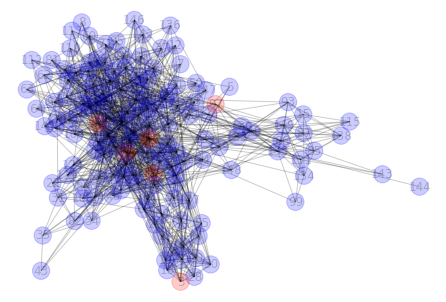

Day number = 30
Infected node count = 18
Recovered node count = 16


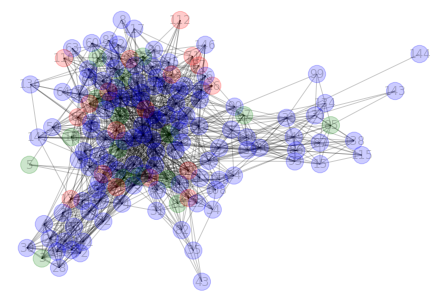

Day number = 50
Infected node count = 22
Recovered node count = 39


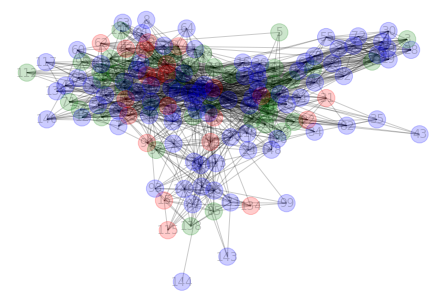

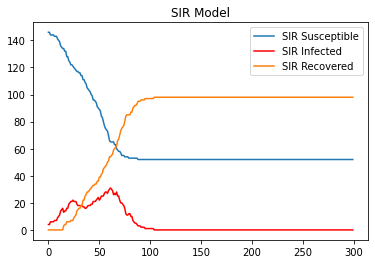

In [ ]:
# Define parameters
initial_infecteds = [10,15,20]
beta = 0.005
t_simulation = 300
recoveryTime = 15

# SIR model function call
SIR_Suscetible, SIR_infected, SIR_recovered = SIR_model(Gx, initial_infecteds , beta, t_simulation, recoveryTime)

**3.c) Second wave**

In [ ]:
def Second_wave(G, initial_infecteds , beta, t_simulation, recoveryTime, new_infections):

    # Initialize parameters 
    population = len(Gx.nodes())  # how many nodes
    beta = beta  
    initialNodesInfected = initial_infecteds

    # Define all empty lists
    sData = []  # susceptible data
    sData_SIR = []
    infectedData = []  # infected data
    recoveredData = [] 
    timeList = []  # time data (0 to time)

    # Function for finding neighbours, recovered and infected nodes
    def getInfected(graph):
        return [x for x,y in graph.nodes(data=True) if y['infected'] == 1 and y['recovered'] == False]

    def getNeighbors(graph, givenNode):
        return [x for x in graph.neighbors(givenNode)]

    def getRecovered(graph):
        return [x for x,y in graph.nodes(data=True) if y['recovered'] == True]

    # accessing nodes
    nodes = G.nodes()

    # setting initial conditions
    for node in nodes:
        if int(node) in initialNodesInfected:
            G.nodes[node]['infected'] = True
        else:
            G.nodes[node]['infected'] = False
        G.nodes[node]['recovered'] = False
        G.nodes[node]['recoveryTime'] = 0

    # Iterate through for t_simulations
    for t in range(t_simulation):
        timeList.append(t)
        
        if t<100:
            # infecting nodes based on beta
            infected = getInfected(G)
            for j in infected:
                neighbors = getNeighbors(G, j)
                for n in neighbors:
                    rand = rd.random()
                    if rand <= beta:
                        G.nodes[n]['infected'] = True

            # Check for recovery of the infected nodes
            for k in infected:
                if G.nodes[k]['recoveryTime'] >= recoveryTime:
                    G.nodes[k]['recovered'] = True
                G.nodes[k]['recoveryTime'] += 1

        # Change in working after second wave
        elif t>=100:
            infected = getInfected(G)

          # Second wave effect in 100th day
            if t == 100:
                sus = []

                # Find susceptible nodes and apply second wave conditions
                for i in G.nodes():
                    if G.nodes[i]['infected']==False: # (G.nodes[i]['infected']==True and G.nodes[i]['recovered']==True) or
                        sus.append(i)

                # Condition for infection count higher than the susceptible count 
                if new_infections > len(sus):
                    new_infected_nodes = random.sample(sus,len(sus))
                else:  
                    new_infected_nodes = random.sample(sus,new_infections)
                new_infected = []
                for r in range(len(new_infected_nodes)):
                    new_infected.append(int(new_infected_nodes[r]))

                # setting new infection conditions for susceptible nodes
                for node in nodes:
                    if int(node) in new_infected:
                        G.nodes[node]['infected'] = True
                        G.nodes[node]['recovered'] = False
                        G.nodes[node]['recoveryTime'] = 0

                # Set 0 recovery for infected nodes
                for k in infected:
                    G.nodes[k]['recoveryTime'] = 0

            # Apply neighbour conditions based on beta
            for j in infected:
                neighbors = getNeighbors(G, j)
            for n in neighbors:
                rand = rd.random()
                if rand <= beta:
                    G.nodes[n]['infected'] = True

            # Set recovery conditions 
            for k in infected:
                if G.nodes[k]['recoveryTime'] >= recoveryTime:
                    G.nodes[k]['recovered'] = True
                G.nodes[k]['recoveryTime'] += 1

        # Append all the outputs infected recovered and susceptible 
        infected = getInfected(G)
        infectedData.append(len(infected))
        recovered = getRecovered(G)
        recoveredData.append(len(recovered))
        sData.append(population - len(infected))
        sData_SIR.append(population - len(infected) - len(recovered))

    # Plot the outputs in the form of a line graph
    plt.title('Second Wave')
    plt.plot(timeList, sData_SIR, label="SW Susceptible")
    plt.plot(timeList, infectedData, label="SW Infected")
    plt.plot(timeList, recoveredData, label="SW Recovered")
    plt.legend()
    plt.show()

    # Return the data output 
    return sData_SIR, infectedData, recoveredData


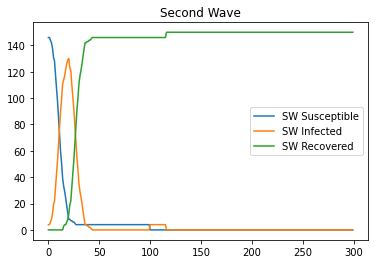

In [ ]:
# Parameter inputs
initial_infecteds = [10,15,20]
beta = 0.02
t_simulation = 300
recoveryTime = 15
new_infections = 30

# Function call for scecond wave
SW_Suscetible, SW_infected, SW_recovered = Second_wave(Gx, initial_infecteds , beta, t_simulation, recoveryTime, new_infections)

**3.d) Remarks**

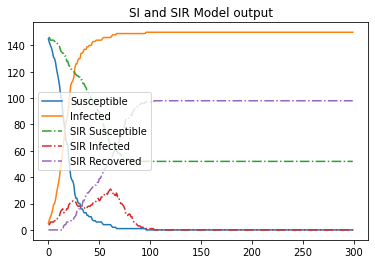

In [ ]:
# Plot and compare SI and SIR model outputs as lineplot 
timeList = np.arange(0,t_simulation)
plt.title('SI and SIR Model output')
plt.plot(timeList, SI_Suscetible, label="Susceptible")
plt.plot(timeList, SI_Infected, label="Infected")
plt.plot(timeList, SIR_Suscetible, label="SIR Susceptible", linestyle='-.')
plt.plot(timeList, SIR_infected, label="SIR Infected", linestyle='-.')
plt.plot(timeList, SIR_recovered, label="SIR Recovered", linestyle='-.')
plt.legend()
plt.show()

In the above line plot, we compared the SI and SIR models for 300 iterations. For the set parameters in the given graph Gx, it can be observed that in the SI model the infections spread fast and reaches more than 90% in just under 50 days. And the susceptible rate decreases with respect to the increase in infected numbers. When there is a change in beta the transmission probability will change and the line might differ.

In the case of the SIR model, the infected count increases in time and after a peak, it falls since there are fewer susceptible nodes than the initial days. The recovery line starts after 2 weeks since the 15 days of recovery time is set. It continues to rise and become saturated at around 100 as most affected people are being recovered by then. 

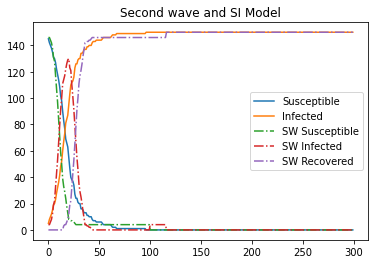

In [ ]:
# Plot second wave against SI model
timeList = np.arange(0,t_simulation)
plt.title('Second wave and SI Model')
plt.plot(timeList, SI_Suscetible, label="Susceptible")
plt.plot(timeList, SI_Infected, label="Infected")
plt.plot(timeList, SW_Suscetible, label="SW Susceptible", linestyle='-.')
plt.plot(timeList, SW_infected, label="SW Infected", linestyle='-.')
plt.plot(timeList, SW_recovered, label="SW Recovered", linestyle='-.')
plt.legend()
plt.show()

From the above graph, we compare the second wave with that of the SI model for the given parameter. Here again, there is a sharp rise in infection due to the beta or infection rate parameter. The susceptible graph is opposite to that of the infected line as people become infected.

During the second wave, it can observe that on the 100th day there is a spike in the number of cases. But it is again on the lower side which is because of the less number of susceptible people within the graph. According to the second wave rule, a person who recovered is prone to the second wave. For example on the 100th day around 5 nodes are only susceptible and all get infected the same day. It takes 15 days to get them cured or recovered, which is the second spike in the SW recovered and SW infected lines.  